\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex, Markdown

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 11 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 11.3
## Given and Find
Sketch the root locus of the armature-controlled dc motor model in terms of the damping constant $c$, and evaluate the effect on the motor time constant. The characteristic equation is

$$L_aIs^2+(R_aI+cL_a)s+cR_a+K_bK_T=0$$

Use the following parameter values:

$$K_b=K_T=0.1\,N\cdot m/A$$
$$R_a=2\,\Omega$$
$$I=12\times10^{-5}\,kg\cdot m^2$$
$$L_a=3\times10^{-3}\,H$$

## Solution

In [2]:
# Define symbols and substitute in for the characteristic equation
La, I, s, Ra, c, Kb, KT = sp.symbols(r'L_a I s R_a c K_b K_T')
Kb_ = KT_ = 0.1
I_ = 12e-5
Ra_ = 2
La_ = 3e-3
eq1 = sp.Eq(La*I*s**2 + (Ra*I + c*La)*s + c*Ra + Kb*KT, 0)
eq2 = eq1.subs([
    (Kb, Kb_),
    (KT, KT_),
    (Ra, Ra_),
    (I, I_),
    (La, La_)
])
poly = eq2.lhs
display(eq1, eq2)

Eq(I*L_a*s**2 + K_T*K_b + R_a*c + s*(I*R_a + L_a*c), 0)

Eq(2*c + 3.6e-7*s**2 + s*(0.003*c + 0.00024) + 0.01, 0)

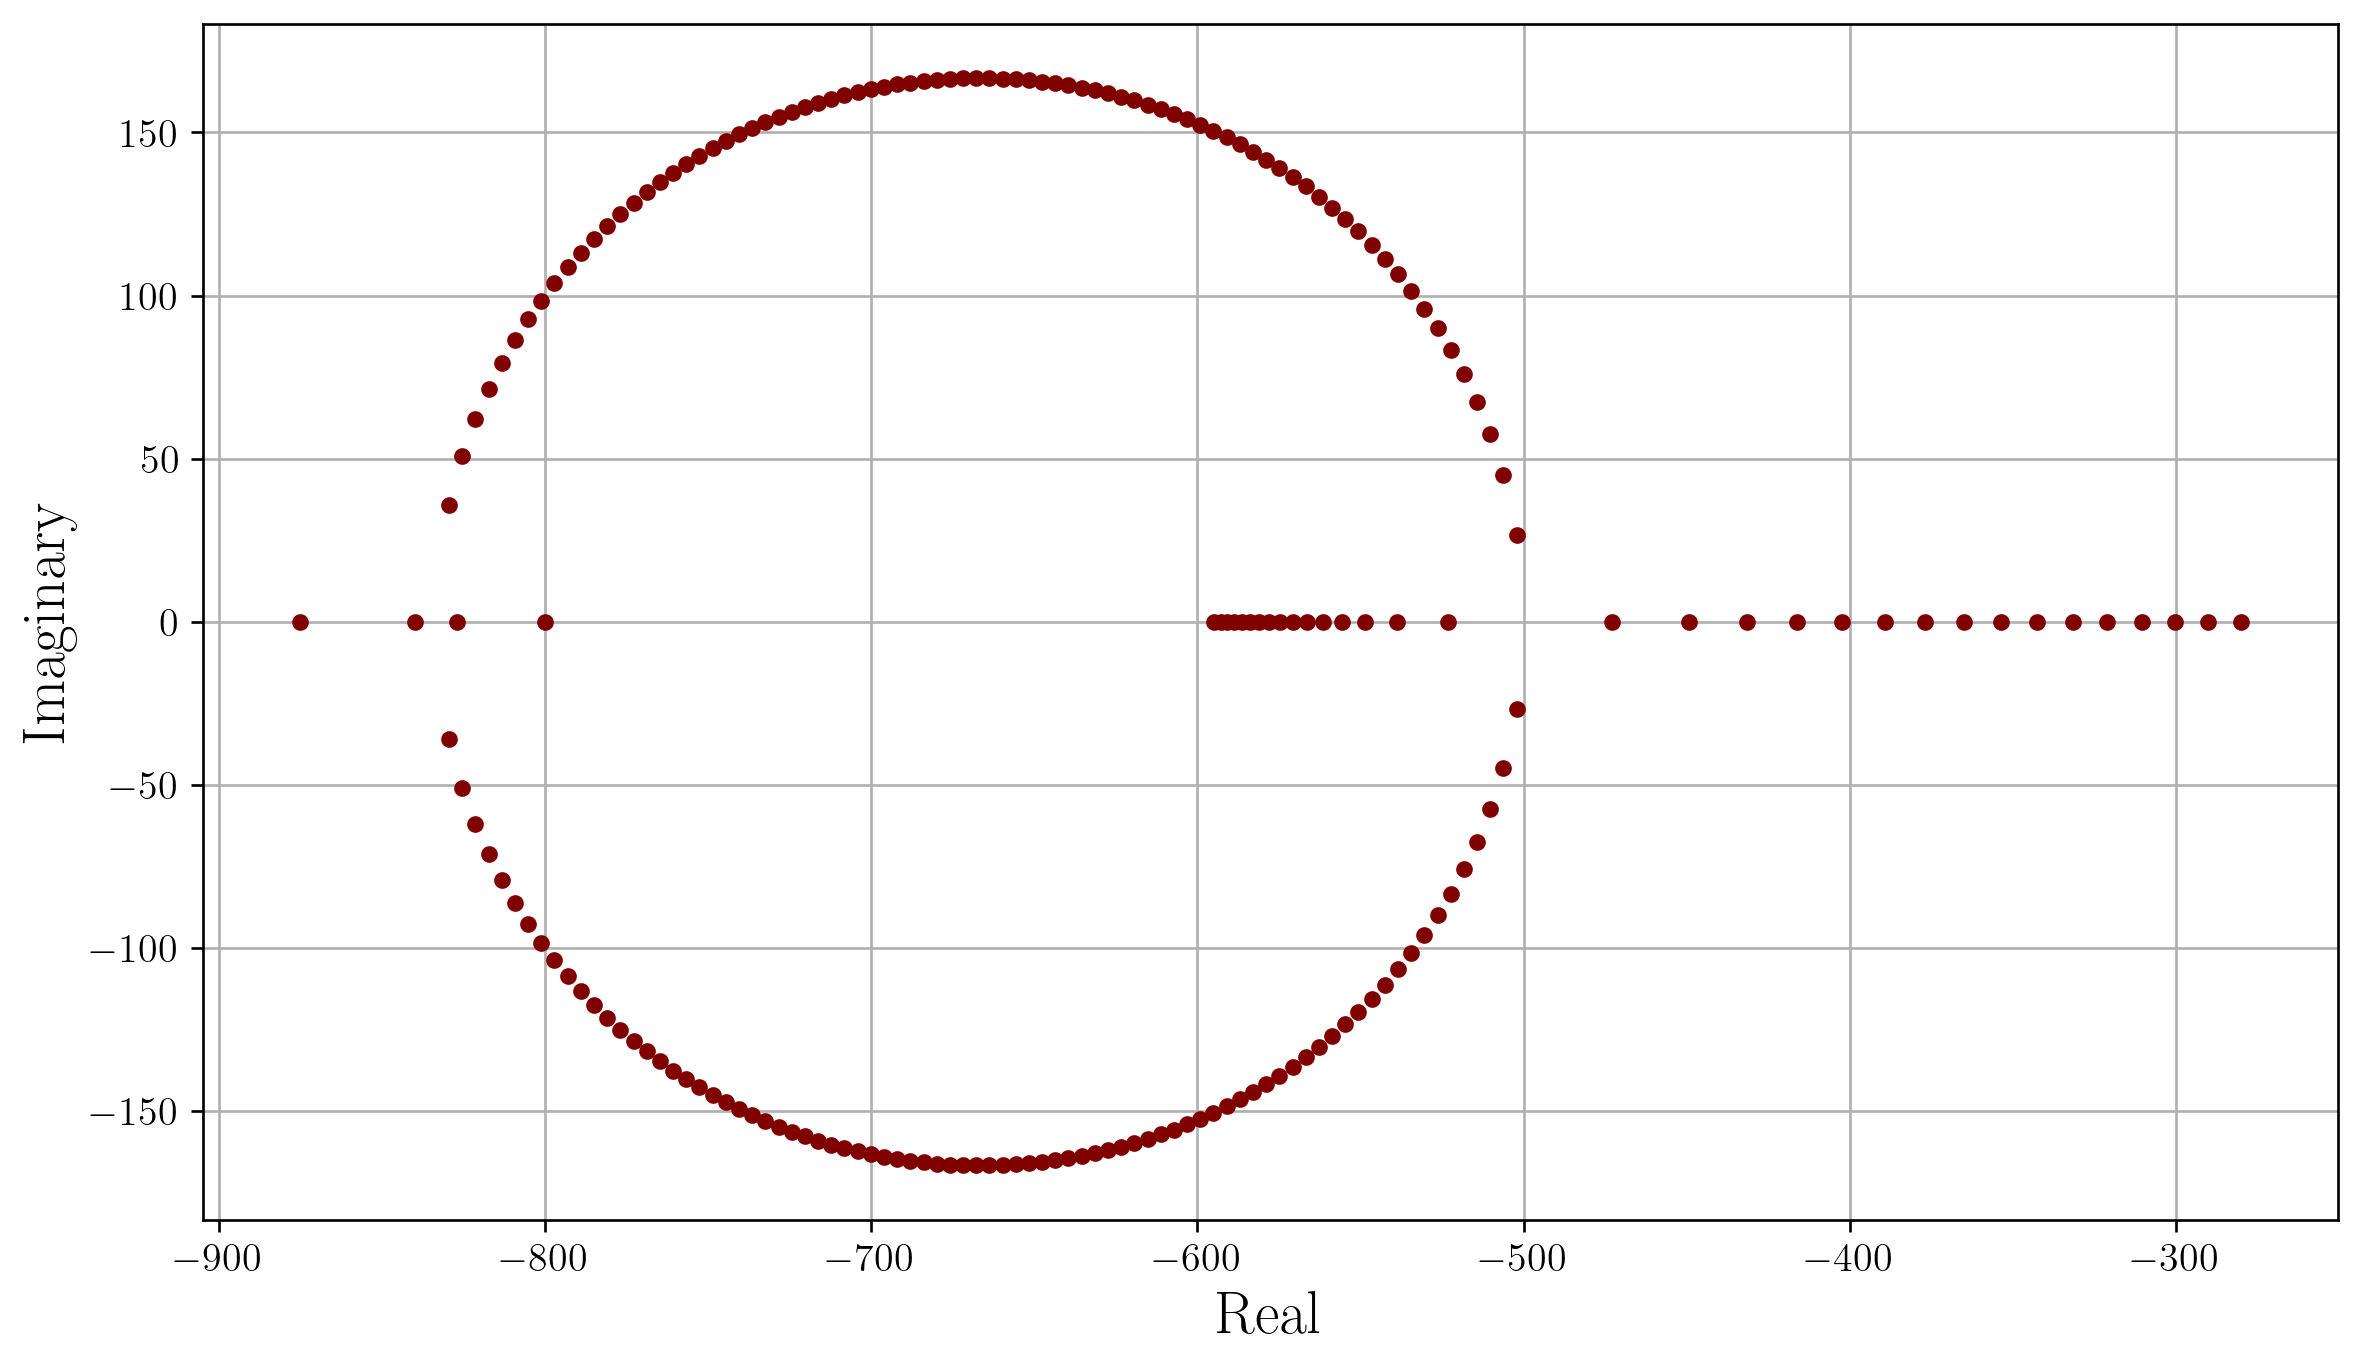

In [3]:
c_values = np.linspace(0.025, 0.121, 100)
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
for c_ in c_values:
    A, B, C = I_*La_, I_*Ra_ + La_*c_, KT_*Kb_ + Ra_*c_
    roots = np.roots([A, B, C])
    ax.scatter(np.real(roots), np.imag(roots), color='maroon', zorder=3, marker='.')
plt.show()

The value of the time constant may be observed by testing increasing values of $c$.

In [4]:
c_list = [0, 10, 100, 1000]
for c_ in c_list:
    roots = list(sp.roots(poly.subs(c, c_)))
    display(Latex(fr'$c={c_}\rightarrow{sp.latex(sp.Matrix(roots).transpose())}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Since the dominant time constants corresponds to the smallest root value in magnitude, it may be observed that the root above converges at $-666.7$, meaning that the time constant is $-\frac{1}{r}=\frac{1}{666.7}=0.0015\,s$ for high damping constants.

The smallest possible time constant may be computed by considering the dominant time constant across the range of $c$ values.

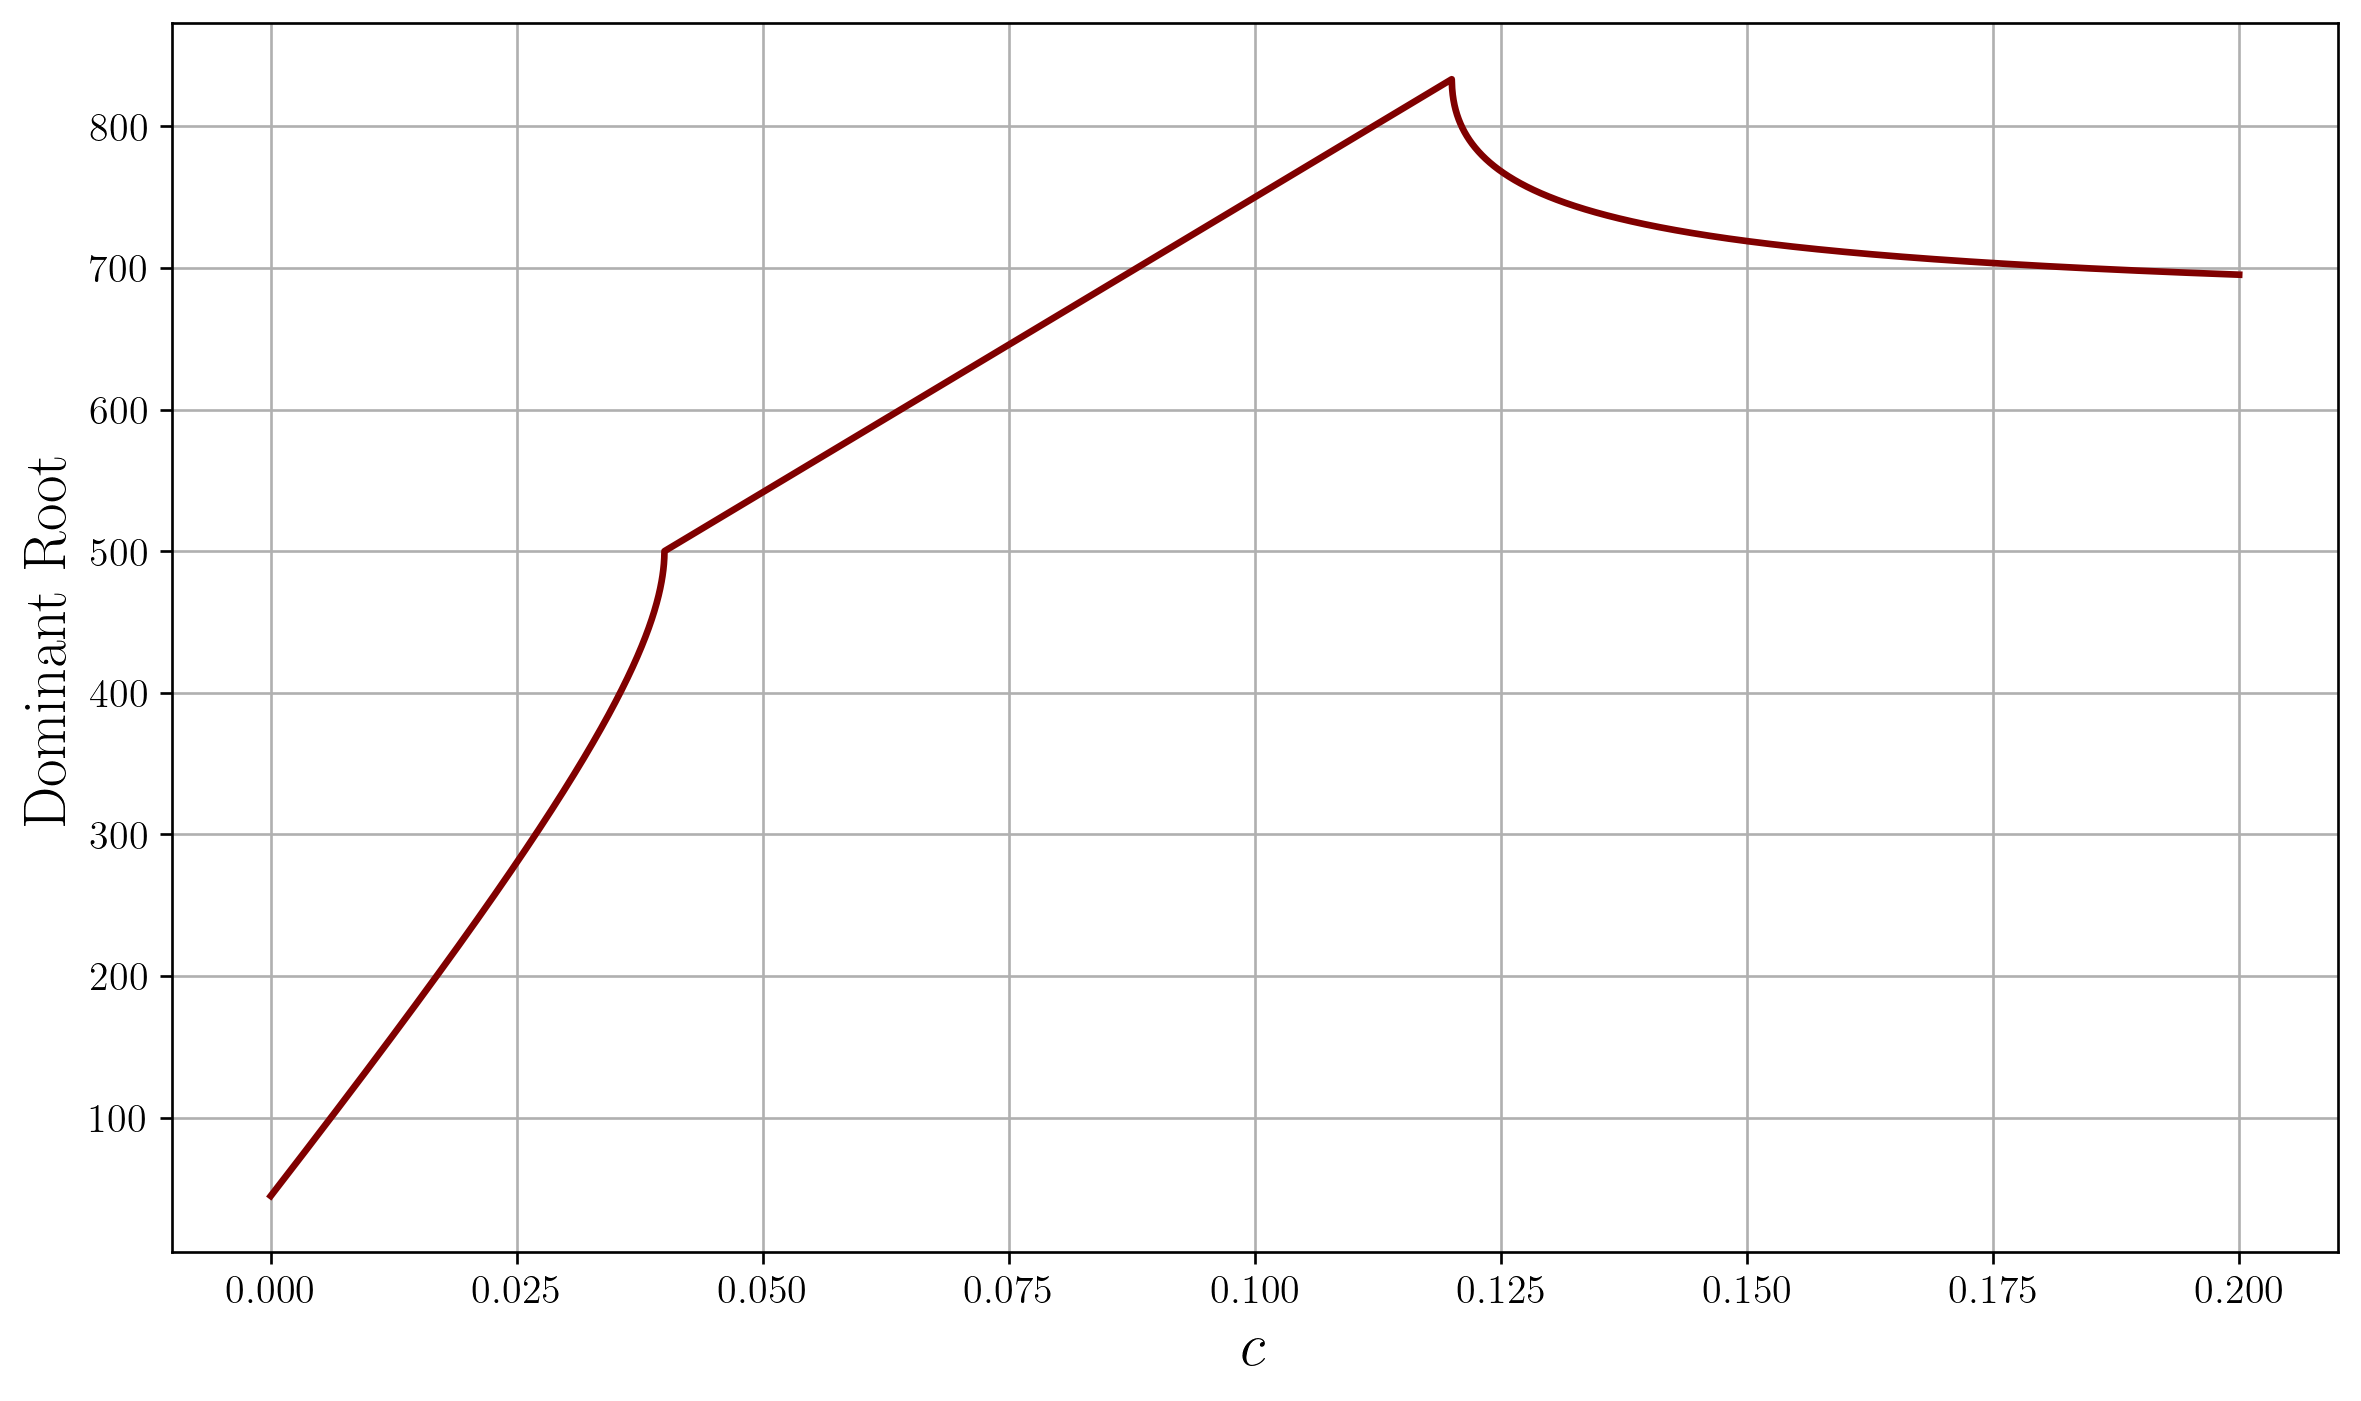

In [5]:
c_values = np.linspace(0, 0.2, 10_000)
dom_reals = []
for c_ in c_values:
    A, B, C = I_*La_, I_*Ra_ + La_*c_, KT_*Kb_ + Ra_*c_
    roots = np.roots([A, B, C])
    real = abs(np.real(roots))
    dom_reals.append(min(real))

fig2, ax2 = plt.subplots()
ax2.plot(c_values, dom_reals)
ax2.set_xlabel('$c$')
ax2.set_ylabel(r'Dominant Root')
plt.show()

In [6]:
display(Markdown(fr'The maximum value corresponds to the smallest time constant and was found to be $\frac{{1}}{{{max(dom_reals):.3f}}}={1/max(dom_reals):.5f}\,s$.'))

The maximum value corresponds to the smallest time constant and was found to be $\frac{1}{833.300}=0.00120\,s$.